In [78]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Step 1 : Understanding the data

In [80]:
carPrice = pd.read_csv("C:\\Users\\Maheshwar\\Desktop\\IIT-B\\Assignment-Linear Regression\\CarPrice_Assignment.csv")
carPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


###  Inspecting the Data

In [81]:
carPrice.shape

(205, 26)

In [82]:
print(carPrice.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [83]:
carPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [84]:
carPrice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


1. From the above it is clear that all columns have non null values.
2. The data type of columns are also correct.

In [85]:
# visualise the numerical data
#sns.pairplot(carPrice)
#plt.show()

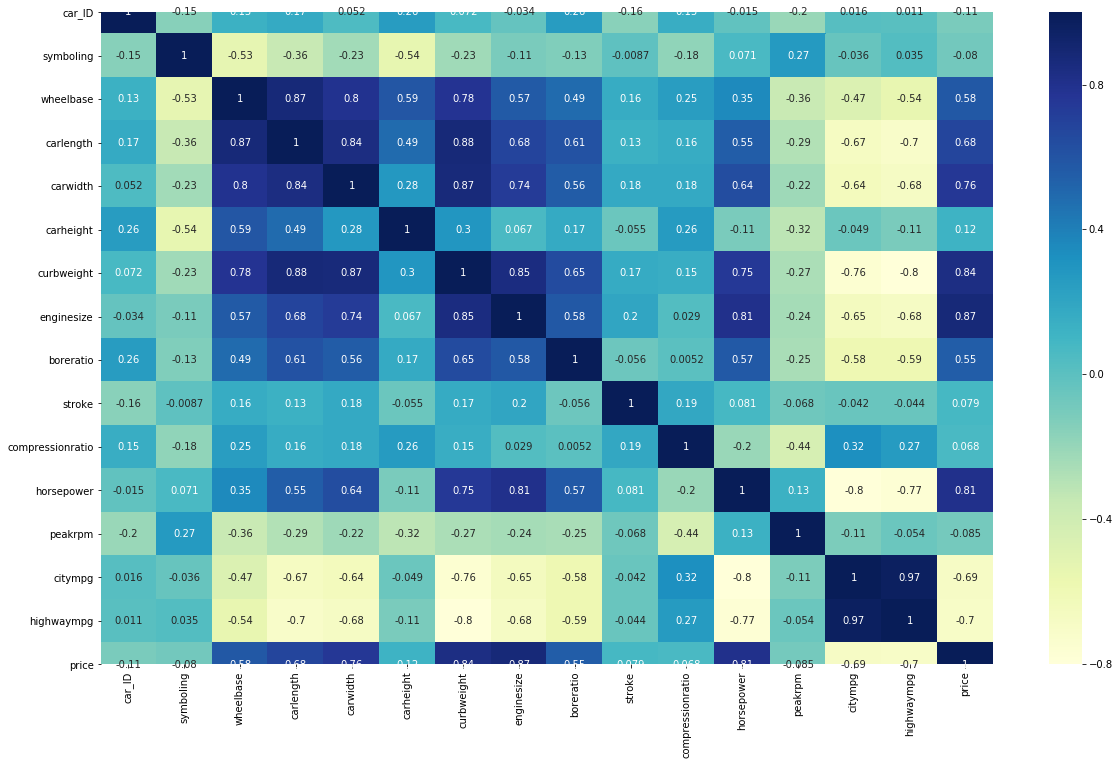

In [86]:
plt.figure(figsize=(20, 12))
sns.heatmap(carPrice.corr() ,cmap='YlGnBu',annot=True)
plt.show()

1. From the above graph it is clear that there exists correaltion between the variables.
2. Highwaympg and citympg are the most highly correlated variables.
3. curbweight and Highwaympg are the most negatively correlated variables.

## Step 2 : Preparing the Data for modelling 

In [87]:
#Splitting company name from CarName column
CompanyName = carPrice['CarName'].apply(lambda x : x.split(' ')[0])
carPrice.insert(3,"CompanyName",CompanyName)
carPrice.drop(['CarName'],axis=1,inplace=True)
carPrice.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [88]:
# checking for unique car company names
carPrice.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

spelling error in the CompanyName column
1. maxda = mazda
2. Nissan = nissan
3. porsche = porcshce
4. toyota = toyouta
5. vokswagen = volkswagen = vw

In [89]:
# correcting the spelling mistakes
carPrice.CompanyName = carPrice.CompanyName.str.lower()

def replace_name(a,b):
    carPrice.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

carPrice.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [90]:
carPrice.CompanyName.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
mercury         1
Name: CompanyName, dtype: int64

## Step 3 : Visualise the Data

### visualise the categorical Data

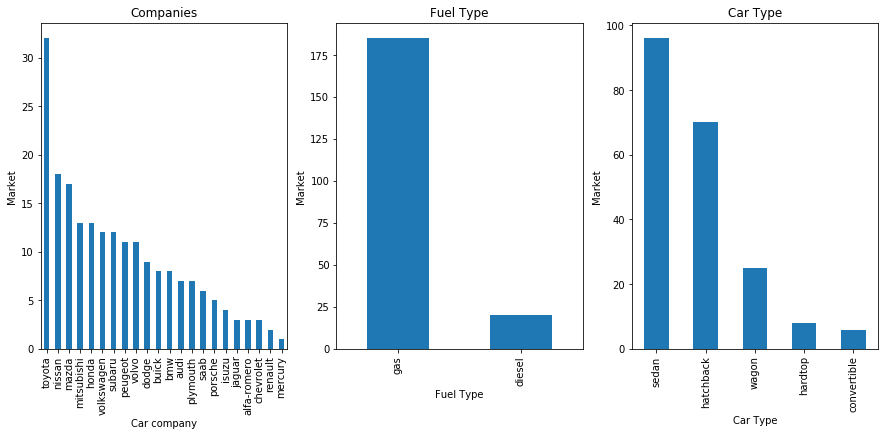

In [91]:
plt.figure(figsize=(15, 6))

plt.subplot(1,3,1)
plt1 = carPrice.CompanyName.value_counts().plot('bar')
plt.title('Companies')
plt1.set(xlabel = 'Car company', ylabel='Market')

plt.subplot(1,3,2)
plt1 = carPrice.fueltype.value_counts().plot('bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Market')

plt.subplot(1,3,3)
plt1 = carPrice.carbody.value_counts().plot('bar')
plt.title('Car Type')
plt1.set(xlabel = 'Car Type', ylabel='Market')

plt.show()

1. Toyato is the most favourite car bought by customers.
2. Nissan and Mazda ranks later in the row.
3. Fuel type with Gas are the most favorable type.
4. Sedan is the most purchased car type by the customers.

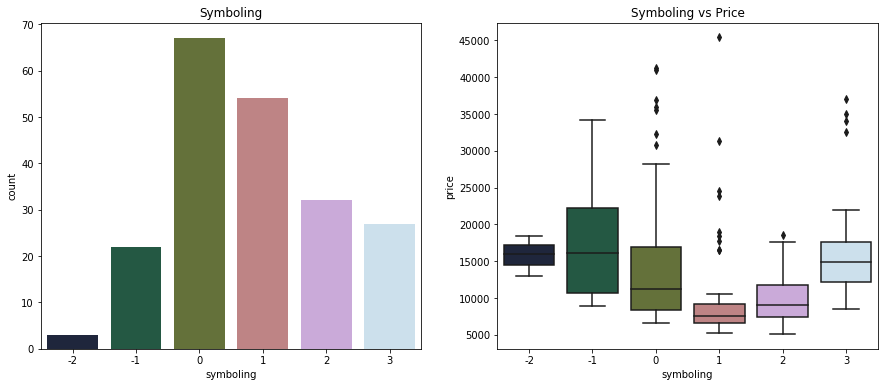

In [92]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('Symboling')
sns.countplot(carPrice.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=carPrice.symboling, y=carPrice.price, palette=("cubehelix"))

plt.show()

1. It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)
2. The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1

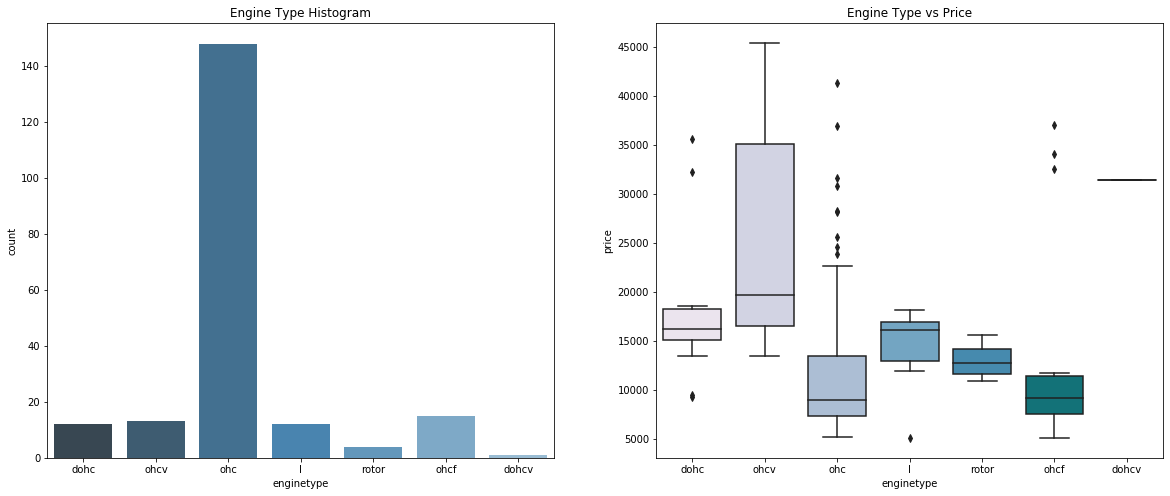

In [93]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(carPrice.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=carPrice.enginetype, y=carPrice.price, palette=("PuBuGn"))

plt.show()

1. ohc Engine type seems to be most favored type.
2. ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

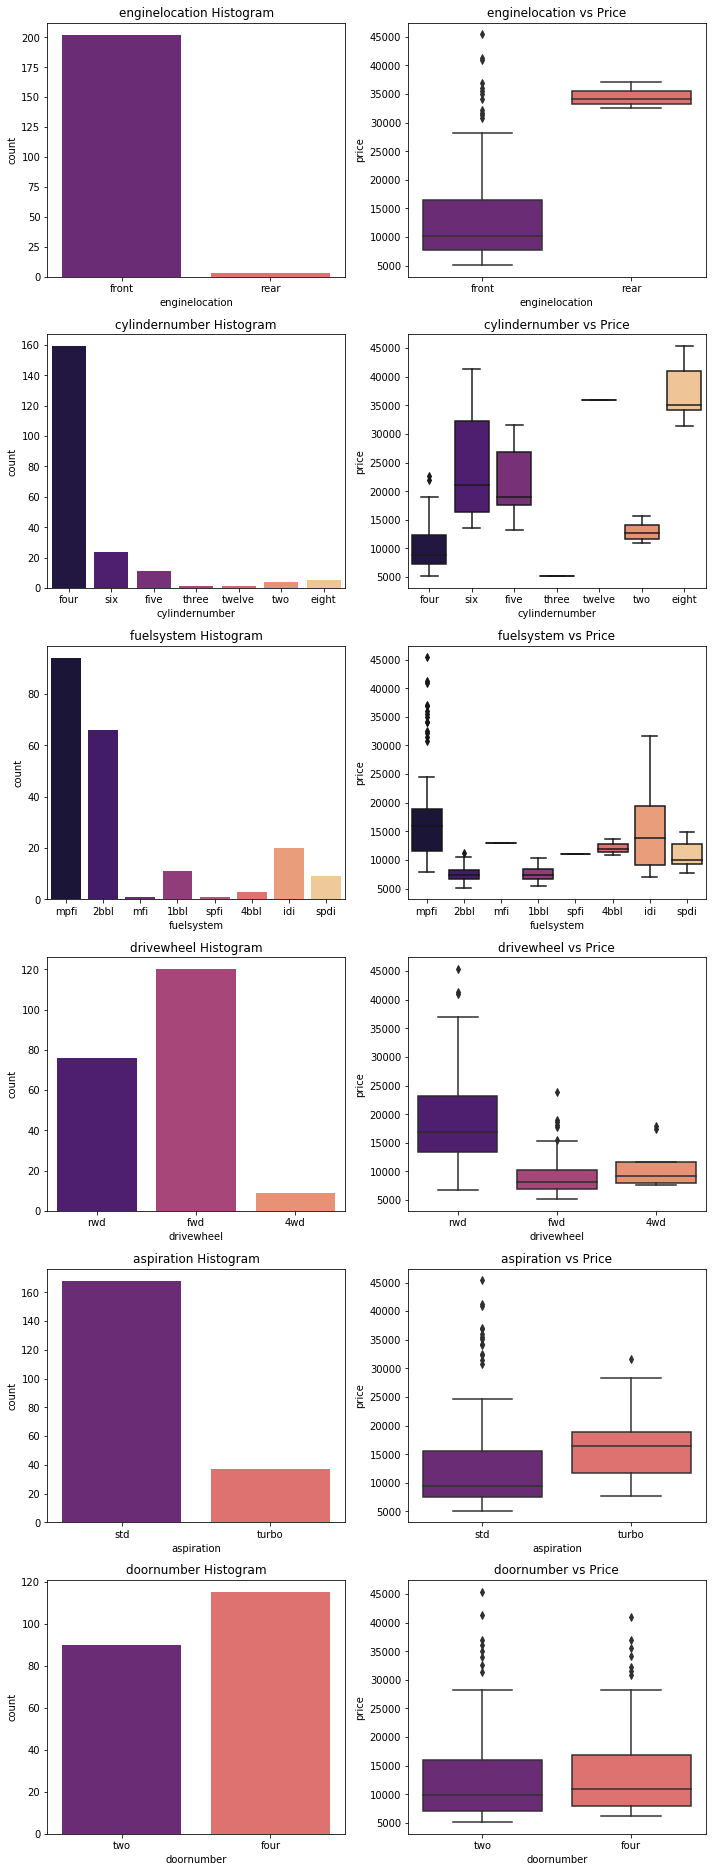

In [94]:
def cat_fea_vis(x,fig):
    '''
    Function to plot categorical variables count and also compares categorical variable with numerical variable
    Parameters:
    x   : Categorical Variable
    fig : index
    
    Returns:
    Count plot
    Boxplot
    '''
    plt.subplot(7,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(carPrice[x],palette=("magma"))
    plt.subplot(7,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=carPrice[x], y=carPrice.price, palette=("magma"))
    
plt.figure(figsize=(10,30))

cat_fea_vis('enginelocation', 1)
cat_fea_vis('cylindernumber', 3)
cat_fea_vis('fuelsystem', 5)
cat_fea_vis('drivewheel', 7)
cat_fea_vis('aspiration', 9)
cat_fea_vis('doornumber', 11)

plt.tight_layout()

1. Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
2. mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range.
3. Most high ranged cars seem to prefer rwd drivewheel.
4. doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it but four door cars are the most favoured car as per the graph.
5. It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

#### visualising numerical data

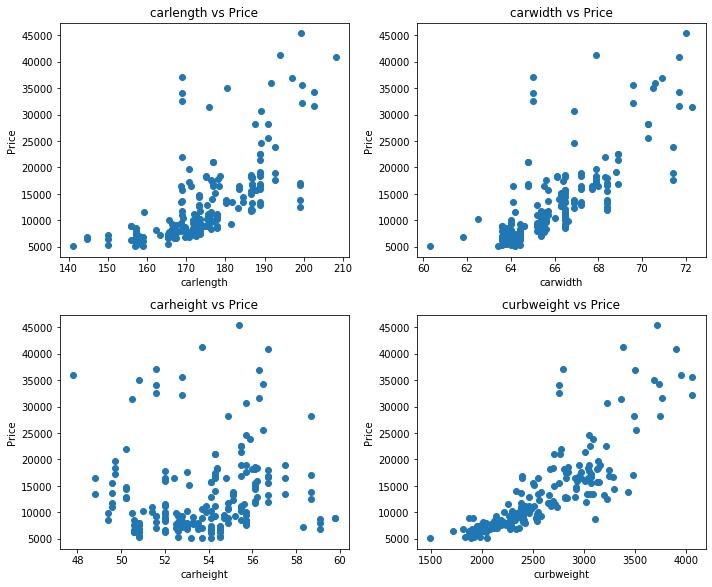

In [95]:
def num_fea_vis(x,fig):
    '''
    Function to plot numerical variables count and also compares  numerical variables
    Parameters:
    x   : Numerical Variable
    fig : index
    
    Returns:
    Scatter Plot
    '''
    plt.subplot(5,2,fig)
    plt.scatter(carPrice[x],carPrice['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

num_fea_vis('carlength', 1)
num_fea_vis('carwidth', 2)
num_fea_vis('carheight', 3)
num_fea_vis('curbweight', 4)

plt.tight_layout()

1. carwidth, carlength and curbweight seems to have a poitive correlation with price.
2. carheight doesn't show any significant pattern with price.

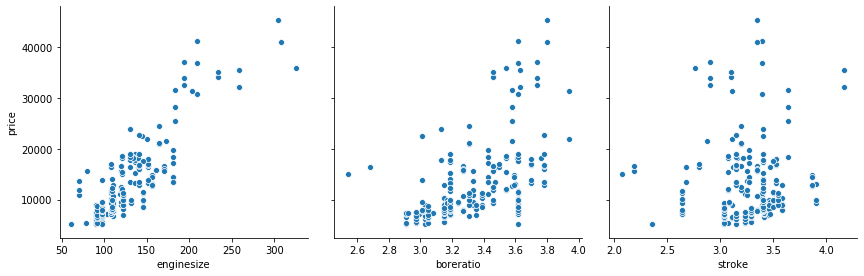

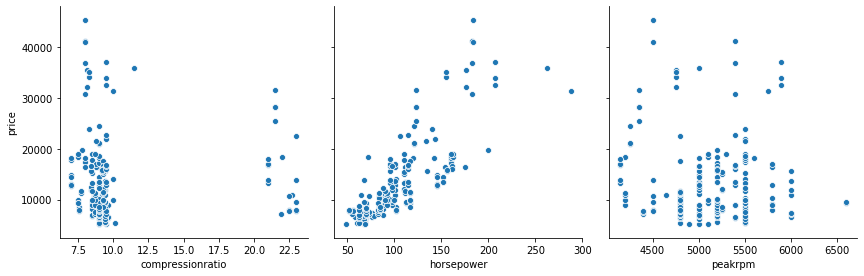

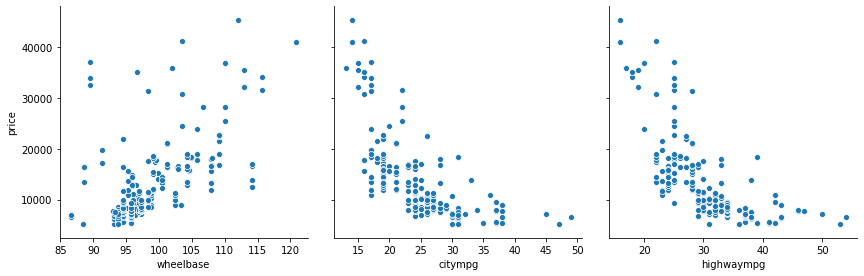

In [96]:
sns.pairplot(carPrice, x_vars=['enginesize', 'boreratio', 'stroke'], y_vars='price',size=4, aspect=1, kind='scatter')
plt.show()

sns.pairplot(carPrice, x_vars=['compressionratio', 'horsepower', 'peakrpm'], y_vars='price',size=4, aspect=1, kind='scatter')
plt.show()

sns.pairplot(carPrice, x_vars=['wheelbase', 'citympg', 'highwaympg'], y_vars='price',size=4, aspect=1, kind='scatter')
plt.show()

1. enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
2. citympg, highwaympg - seem to have a significant negative correlation with price.

#### Deriving new features

In [97]:
#Fuel economy
carPrice['fueleconomy'] = (0.55 * carPrice['citympg']) + (0.45 * carPrice['highwaympg'])

In [98]:
#Binning the Car Companies based on avg prices of each Company.
carPrice['price']     = carPrice['price'].astype('int')
temp                  = carPrice.copy()
table                 = temp.groupby(['CompanyName'])['price'].mean()
temp                  = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins                  = [0,10000,20000,40000]
cars_bin              = ['Lowerend','Midrange','Highend']
carPrice['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
carPrice.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Midrange
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Midrange
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Midrange
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Midrange
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Midrange


#### Bivariate Analysis

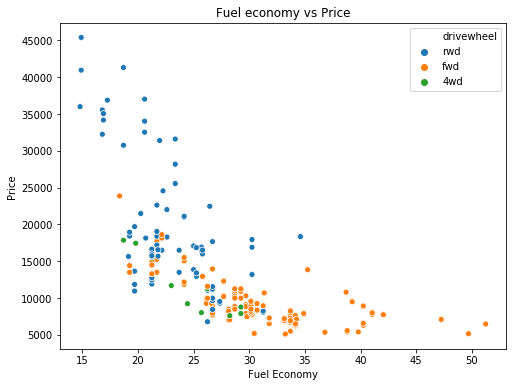

<Figure size 432x288 with 0 Axes>

In [99]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=carPrice['fueleconomy'],y=carPrice['price'],hue=carPrice['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

1. fueleconomy has negative correlation with price and it is significant.

<Figure size 2160x1080 with 0 Axes>

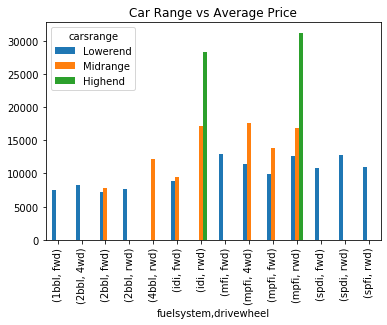

In [100]:
plt.figure(figsize=(30, 15))

df = pd.DataFrame(carPrice.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

1.Lowend cars ran be run on any fuelsystem and drive wheel.
2. Midrange prefer 2bbl,fwd idl,fwd idl,rwd 
3. High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.

As I exactly didn't know what are the keyfactors I decided to consider all variables and perform analysis and provide the solution that is accurate and apt.

#### Dummy Variables Creation

1. fueltype has 2 levels gas and diesel.
2. aspiration has 2 levels std and turbo.
3. doornumber has 2 levels four and two.
4. carbody has 5 levels convertible,hardtop,hatchback,sedan and wagon.
5. drivewheel has 3 levels rwd,fwd and 4wd.
6. enginelocation has 2 levels front,rear.
7. enginetype has 7 levels dohc,dohcv,I,ohc,ohcf,ohcv and rotor.
8. cylindernumber has 7 levels two,three,four,five,six,eight and twelve.
9. symboling has 6 levels -2,-1,0,1,2,3. 

Mapping Variables with just 2 levels:

In [101]:
# List of variables to map which is in yes/no format: 

varlist =  ['fueltype', 'aspiration', 'doornumber', 'enginelocation']

# Defining the map function
def binary_map(x):
    return x.map({'diesel': 1, "gas": 0 ,'std': 0 , 'turbo' : 1,'four':0 ,'two':1, 'front':0 ,'rear':1})

# Applying the function to the housing list
carPrice[varlist] = carPrice[varlist].apply(binary_map)

In [102]:
carPrice.tail()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
200,201,-1,volvo,0,0,0,sedan,rwd,0,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845,25.25,Midrange
201,202,-1,volvo,0,1,0,sedan,rwd,0,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045,21.70,Midrange
202,203,-1,volvo,0,0,0,sedan,rwd,0,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485,20.25,Midrange
203,204,-1,volvo,1,1,0,sedan,rwd,0,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470,26.45,Midrange
204,205,-1,volvo,0,1,0,sedan,rwd,0,109.1,...,3.78,3.15,9.5,114,5400,19,25,22625,21.70,Midrange


Creating Dummy variables for variables with more than 2 levels.

In [103]:
body = pd.get_dummies(carPrice.carbody)
body.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


- `0000` will correspond to `convertible`
- `1000` will correspond to `hardtop`
- `0100` will correspond to `hatchback` 
- `0010` will correspond to `sedan` 
- `0001` will correspond to `wagon` 

#### After converting to K-1 level

In [104]:
body = pd.get_dummies(carPrice.carbody , drop_first = True)
body.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [105]:
cylinder = pd.get_dummies(carPrice.cylindernumber)
cylinder.head()

,eight,five,four,six,three,twelve,two
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


- `000000` will correspond to `eight`
- `100000` will correspond to `five`
- `010000` will correspond to `four` 
- `001000` will correspond to `six` 
- `000100` will correspond to `three` 
- `000010` will correspond to `twelve`
- `000001` will correspond to `two`

In [106]:
cylinder = pd.get_dummies(carPrice.cylindernumber , drop_first = True)
cylinder.head()

,five,four,six,three,twelve,two
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [107]:
engine = pd.get_dummies(carPrice.enginetype)
engine.head()

,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


- `000000` will correspond to `dohc`
- `100000` will correspond to `dohcv`
- `010000` will correspond to `I` 
- `001000` will correspond to `ohc` 
- `000100` will correspond to `ohcf` 
- `000010` will correspond to `ohcv`
- `000001` will correspond to `rotor`

In [108]:
engine = pd.get_dummies(carPrice.enginetype , drop_first = True)
engine.head()

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [109]:
wheel = pd.get_dummies(carPrice.drivewheel)
wheel.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


- `00` will correspond to `4wd` 
- `10` will correspond to `fwd
- `01` will correspond to `rwd

In [110]:
wheel = pd.get_dummies(carPrice.drivewheel , drop_first = True)
wheel.head()

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [111]:
symbolling = pd.get_dummies(carPrice.symboling)
symbolling.head()

,-2,-1,0,1,2,3
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


- `00000` will correspond to `-2` 
- `10000` will correspond to `-1`
- `01000` will correspond to `0`
- `00100` will correspond to `1` 
- `00010` will correspond to `2`
- `00001` will correspond to `3`

In [112]:
symbolling = pd.get_dummies(carPrice.symboling, drop_first = True)
symbolling.head()

,-1,0,1,2,3
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [113]:
carrange = pd.get_dummies(carPrice.carsrange , drop_first = True)
carrange.head()

,Midrange,Highend
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [114]:
# Add results to the original dataframe
carPrice = pd.concat([carPrice,wheel,engine,cylinder,body,symbolling,carrange] , axis = 1)
carPrice.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,hatchback,sedan,wagon,-1,0,1,2,3,Midrange,Highend
0,1,3,alfa-romero,0,0,1,convertible,rwd,0,88.6,...,0,0,0,0,0,0,0,1,1,0
1,2,3,alfa-romero,0,0,1,convertible,rwd,0,88.6,...,0,0,0,0,0,0,0,1,1,0
2,3,1,alfa-romero,0,0,1,hatchback,rwd,0,94.5,...,1,0,0,0,0,1,0,0,1,0
3,4,2,audi,0,0,0,sedan,fwd,0,99.8,...,0,1,0,0,0,0,1,0,1,0
4,5,2,audi,0,0,0,sedan,4wd,0,99.4,...,0,1,0,0,0,0,1,0,1,0


In [115]:
carPrice.columns

Index([          'car_ID',        'symboling',      'CompanyName',
               'fueltype',       'aspiration',       'doornumber',
                'carbody',       'drivewheel',   'enginelocation',
              'wheelbase',        'carlength',         'carwidth',
              'carheight',       'curbweight',       'enginetype',
         'cylindernumber',       'enginesize',       'fuelsystem',
              'boreratio',           'stroke', 'compressionratio',
             'horsepower',          'peakrpm',          'citympg',
             'highwaympg',            'price',      'fueleconomy',
              'carsrange',              'fwd',              'rwd',
                  'dohcv',                'l',              'ohc',
                   'ohcf',             'ohcv',            'rotor',
                   'five',             'four',              'six',
                  'three',           'twelve',              'two',
                'hardtop',        'hatchback',            'sed

In [116]:
# Drop wheel,engine,cylinder,body  as we have created the dummies for it
carPrice.drop(['enginetype','cylindernumber','drivewheel','carbody','symboling','carsrange'] , axis = 1 , inplace = True)
carPrice.head()

,car_ID,CompanyName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,hatchback,sedan,wagon,-1,0,1,2,3,Midrange,Highend
0,1,alfa-romero,0,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,1,0
1,2,alfa-romero,0,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,1,1,0
2,3,alfa-romero,0,0,1,0,94.5,171.2,65.5,52.4,...,1,0,0,0,0,1,0,0,1,0
3,4,audi,0,0,0,0,99.8,176.6,66.2,54.3,...,0,1,0,0,0,0,1,0,1,0
4,5,audi,0,0,0,0,99.4,176.6,66.4,54.3,...,0,1,0,0,0,0,1,0,1,0


In [117]:
carPrice.columns

Index([          'car_ID',      'CompanyName',         'fueltype',
             'aspiration',       'doornumber',   'enginelocation',
              'wheelbase',        'carlength',         'carwidth',
              'carheight',       'curbweight',       'enginesize',
             'fuelsystem',        'boreratio',           'stroke',
       'compressionratio',       'horsepower',          'peakrpm',
                'citympg',       'highwaympg',            'price',
            'fueleconomy',              'fwd',              'rwd',
                  'dohcv',                'l',              'ohc',
                   'ohcf',             'ohcv',            'rotor',
                   'five',             'four',              'six',
                  'three',           'twelve',              'two',
                'hardtop',        'hatchback',            'sedan',
                  'wagon',                 -1,                  0,
                        1,                  2,                

In [118]:
# Consedering the columns that is giving meaningful insights to build the model
# to select subset of dataframe excluding these two columns
carPrice_df = carPrice[['fueltype', 'aspiration', 'doornumber','enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'fueleconomy','fwd', 'rwd','dohcv', 'l', 'ohc', 'ohcf',  'ohcv','rotor',  'five','four','six', 'three','twelve','two', 'hardtop','hatchback','sedan','wagon','Midrange','Highend']]
carPrice_df.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,six,three,twelve,two,hardtop,hatchback,sedan,wagon,Midrange,Highend
0,0,0,1,0,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,94.5,171.2,65.5,52.4,2823,152,...,1,0,0,0,0,1,0,0,1,0
3,0,0,0,0,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,0,1,0,1,0


### Splitting the Data into Training and Testing Sets

In [119]:
carPrice_train,carPrice_test = train_test_split(carPrice_df , train_size = 0.7 , random_state = 100)

In [120]:
print(carPrice_train.shape)
print(carPrice_train.head())

(143, 39)
     fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  \
122         0           0           0               0       93.7      167.3   
125         0           0           1               0       94.5      168.9   
166         0           0           1               0       94.5      168.7   
1           0           0           1               0       88.6      168.8   
199         0           1           0               0      104.3      188.8   

     carwidth  carheight  curbweight  enginesize  ...  six  three  twelve  \
122      63.8       50.8        2191          98  ...    0      0       0   
125      68.3       50.2        2778         151  ...    0      0       0   
166      64.0       52.6        2300          98  ...    0      0       0   
1        64.1       48.8        2548         130  ...    0      0       0   
199      67.2       57.5        3157         130  ...    0      0       0   

     two  hardtop  hatchback  sedan  wagon  Midrange

In [121]:
print(carPrice_test.shape)
print(carPrice_test.head())

(62, 39)
     fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  \
160         0           0           0               0       95.7      166.3   
186         0           0           0               0       97.3      171.7   
59          0           0           1               0       98.8      177.8   
165         0           0           1               0       94.5      168.7   
140         0           0           1               0       93.3      157.3   

     carwidth  carheight  curbweight  enginesize  ...  six  three  twelve  \
160      64.4       53.0        2094          98  ...    0      0       0   
186      65.5       55.7        2275         109  ...    0      0       0   
59       66.5       53.7        2385         122  ...    0      0       0   
165      64.0       52.6        2265          98  ...    0      0       0   
140      63.8       55.7        2240         108  ...    0      0       0   

     two  hardtop  hatchback  sedan  wagon  Midrange 

### Rescaling the Features 

We will use MinMax scaling.

In [122]:
scaler = MinMaxScaler()

# provide all numerical columns 
num_feature = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
carPrice_train[num_feature] = scaler.fit_transform(carPrice_train[num_feature])
carPrice_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,six,three,twelve,two,hardtop,hatchback,sedan,wagon,Midrange,Highend
122,0,0,0,0,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,...,0,0,0,0,0,0,1,0,0,0
125,0,0,1,0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,...,0,0,0,0,0,1,0,0,0,1
166,0,0,1,0,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,...,0,0,0,0,0,0,0,0,1,0
199,0,1,0,0,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,...,0,0,0,0,0,0,0,1,1,0


#### Dividing into X and y sets for Model Building

In [123]:
y_train = carPrice_train.pop('price')
X_train = carPrice_train

In [124]:
print(X_train.head())

     fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  \
122         0           0           0               0   0.244828   0.426016   
125         0           0           1               0   0.272414   0.452033   
166         0           0           1               0   0.272414   0.448780   
1           0           0           1               0   0.068966   0.450407   
199         0           1           0               0   0.610345   0.775610   

     carwidth  carheight  curbweight  enginesize  ...  six  three  twelve  \
122  0.291667   0.265487    0.272692    0.139623  ...    0      0       0   
125  0.666667   0.212389    0.500388    0.339623  ...    0      0       0   
166  0.308333   0.424779    0.314973    0.139623  ...    0      0       0   
1    0.316667   0.088496    0.411171    0.260377  ...    0      0       0   
199  0.575000   0.858407    0.647401    0.260377  ...    0      0       0   

     two  hardtop  hatchback  sedan  wagon  Midrange  Highend 

In [125]:
X_train.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'fueleconomy', 'fwd', 'rwd', 'dohcv', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three',
       'twelve', 'two', 'hardtop', 'hatchback', 'sedan', 'wagon', 'Midrange',
       'Highend'],
      dtype='object')

In [126]:
print(y_train.head())

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64


## Step 4 : Model Building 

In [127]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [128]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 10),
 ('aspiration', False, 21),
 ('doornumber', False, 28),
 ('enginelocation', True, 1),
 ('wheelbase', False, 14),
 ('carlength', False, 17),
 ('carwidth', True, 1),
 ('carheight', False, 24),
 ('curbweight', True, 1),
 ('enginesize', False, 6),
 ('boreratio', False, 4),
 ('stroke', False, 7),
 ('compressionratio', False, 25),
 ('horsepower', True, 1),
 ('peakrpm', False, 11),
 ('citympg', False, 19),
 ('highwaympg', False, 15),
 ('fueleconomy', False, 29),
 ('fwd', False, 20),
 ('rwd', False, 26),
 ('dohcv', True, 1),
 ('l', False, 22),
 ('ohc', False, 9),
 ('ohcf', False, 16),
 ('ohcv', False, 12),
 ('rotor', False, 8),
 ('five', False, 23),
 ('four', False, 13),
 ('six', False, 27),
 ('three', True, 1),
 ('twelve', False, 3),
 ('two', False, 5),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', False, 2),
 ('wagon', True, 1),
 ('Midrange', False, 18),
 ('Highend', True, 1)]

#### Summarising on columns choosen and not choosen for RFE

In [129]:
# columns that has been choosen for rfe
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'horsepower', 'dohcv',
       'three', 'hardtop', 'hatchback', 'wagon', 'Highend'],
      dtype='object')

In [130]:
# columns not choosen for rfe
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'peakrpm', 'citympg', 'highwaympg', 'fueleconomy', 'fwd', 'rwd', 'l',
       'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'twelve', 'two',
       'sedan', 'Midrange'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [131]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [132]:
def buildModel(X_train,y_train):
    '''
    Stats Model is used for Model Building
    
    
    Parameters:
    X_train : Independent features on which we want to build the model.
    y_train : Dependent features on which we want to build the model.
    
    Return:
    X_train
    '''
    X_train = sm.add_constant(X_train)
    lm      = sm.OLS(y_train,X_train).fit()
    # display summary
    print(lm.summary())
    return X_train

In [133]:
def vifcheck(X_train):
    '''
    method calculates Variance Inflation Factor.
    
    Parameter:
    X_train : Predictor feature on which the VIF needs to be calculated
    
    Return:
    VIF DataFrame with Columns and their respective VIF
    '''
    
    vif             = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF']      = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
    vif['VIF']      = round(vif['VIF'],2)
    vif             = vif.sort_values(by = 'VIF' , ascending = False)
    
    return (vif)

### Model 1

In [134]:
X_train_1 = buildModel(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.21e-70
Time:                        13:48:59   Log-Likelihood:                 205.92
No. Observations:                 143   AIC:                            -389.8
Df Residuals:                     132   BIC:                            -357.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1028      0.017     -5.

In [135]:
vifcheck(X_train_rfe)

,Features,VIF
2,curbweight,39.52
1,carwidth,24.97
3,horsepower,11.50
9,Highend,1.88
0,enginelocation,1.72
7,hatchback,1.64
6,hardtop,1.53
4,dohcv,1.47
8,wagon,1.41
5,three,1.03


1. hardtop has p-value of 0.687 which is above 0.05 thereby making the predictor insignicant.
2. On the other hand the vif of hardtop is 1.53 which is low rejecting the multicollinearity.
3. But the scenario falls under high p-value and low vif which makes it eligible for elimination and so drop hardtop to verify to have the model with all 0 p-values and vif less than 5.

In [136]:
X_train_1 = X_train_rfe.drop(["hardtop"], axis = 1)

### Model 2

In [137]:
X_train_1 = buildModel(X_train_1,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     192.7
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           9.14e-72
Time:                        13:48:59   Log-Likelihood:                 205.83
No. Observations:                 143   AIC:                            -391.7
Df Residuals:                     133   BIC:                            -362.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1039      0.017     -6.

In [138]:
vifcheck(X_train_1)

,Features,VIF
0,const,11.67
3,curbweight,8.34
2,carwidth,5.10
4,horsepower,3.98
9,Highend,1.71
5,dohcv,1.50
7,hatchback,1.30
8,wagon,1.27
1,enginelocation,1.23
6,three,1.07


1. three has p-value of 0.035 which is above 0 thereby making the predictor insignicant.
2. On the other hand the vif of three is 1.07 which is low rejecting the multicollinearity.
3. But the scenario falls under high p-value and low vif which makes it eligible for elimination and so drop three to verify to have the model with all 0 p-values and vif less than 5.

In [139]:
X_train_1 = X_train_1.drop(["three"] , axis = 1)

#### Model 3

In [140]:
X_train_1 = buildModel(X_train_1,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     210.6
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           5.59e-72
Time:                        13:49:00   Log-Likelihood:                 203.43
No. Observations:                 143   AIC:                            -388.9
Df Residuals:                     134   BIC:                            -362.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0968      0.017     -5.

In [141]:
vifcheck(X_train_1)

,Features,VIF
0,const,11.23
3,curbweight,8.32
2,carwidth,4.97
4,horsepower,3.98
8,Highend,1.70
5,dohcv,1.50
6,hatchback,1.29
7,wagon,1.27
1,enginelocation,1.23


1. hatchback has p-value of 0.032 which is above 0 thereby making the predictor insignicant.
2. On the other hand the vif of hatchback is 1.29 which is low rejecting the multicollinearity.
3. But the scenario falls under high p-value and low vif which makes it eligible for elimination and so drop hatchback to verify to have the model with all 0 p-values and vif less than 5.

In [142]:
X_train_1 = X_train_1.drop(["hatchback"] , axis = 1)

#### Model 4

In [143]:
X_train_1 = buildModel(X_train_1,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     234.8
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           2.62e-72
Time:                        13:49:00   Log-Likelihood:                 201.28
No. Observations:                 143   AIC:                            -386.6
Df Residuals:                     135   BIC:                            -362.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1120      0.015     -7.

In [144]:
vifcheck(X_train_1)

,Features,VIF
0,const,9.00
3,curbweight,8.00
2,carwidth,4.97
4,horsepower,3.74
7,Highend,1.69
5,dohcv,1.50
6,wagon,1.22
1,enginelocation,1.21


1. wagon has p-value of 0.032 which is above 0 thereby making the predictor insignicant.
2. On the other hand the vif of wagon is 1.22 which is low rejecting the multicollinearity.
3. But the scenario falls under high p-value and low vif which makes it eligible for elimination and so drop wagon to verify to have the model with all 0 p-values and vif less than 5.

In [145]:
X_train_1 = X_train_1.drop(["wagon"] ,axis = 1)

#### Model 5

In [146]:
X_train_1 = buildModel(X_train_1,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     265.8
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           1.55e-72
Time:                        13:49:00   Log-Likelihood:                 198.83
No. Observations:                 143   AIC:                            -383.7
Df Residuals:                     136   BIC:                            -362.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1164      0.015     -7.

In [147]:
vifcheck(X_train_1)

,Features,VIF
0,const,8.85
3,curbweight,6.66
2,carwidth,4.67
4,horsepower,3.43
6,Highend,1.64
5,dohcv,1.45
1,enginelocation,1.21


1. dohcv has p-value of 0.009 which is above 0.05 thereby making the predictor insignicant.
2. On the other hand the vif of dohcv is 1.21 which is low rejecting the multicollinearity.
3. But the scenario falls under high p-value and low vif which makes it eligible for elimination and so drop dohcv to verify to have the model with all 0 p-values and vif less than 5.

In [148]:
X_train_1 = X_train_1.drop(["dohcv"] , axis = 1)

#### Model 6

In [149]:
X_train_1 = buildModel(X_train_1,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     304.0
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           2.69e-72
Time:                        13:49:01   Log-Likelihood:                 195.18
No. Observations:                 143   AIC:                            -378.4
Df Residuals:                     137   BIC:                            -360.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1102      0.016     -7.

In [150]:
vifcheck(X_train_1)

,Features,VIF
0,const,8.65
3,curbweight,5.53
2,carwidth,4.36
4,horsepower,2.71
5,Highend,1.61
1,enginelocation,1.17


1. enginelocation has p-value of 0.01.
2. On the other hand the vif of enginelocation is 1.17 which is low rejecting the multicollinearity.
3. But the scenario falls under high p-value and low vif which makes it eligible for elimination and so drop enginelocation to verify to have the model with all 0 p-values and vif less than 5.

In [151]:
X_train_1 = X_train_1.drop(["enginelocation"] , axis = 1)

#### Model 7

In [152]:
X_train_1 = buildModel(X_train_1,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     349.8
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           3.77e-71
Time:                        13:49:01   Log-Likelihood:                 189.29
No. Observations:                 143   AIC:                            -368.6
Df Residuals:                     138   BIC:                            -353.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1010      0.016     -6.358      0.0

In [153]:
vifcheck(X_train_1)

,Features,VIF
0,const,8.39
2,curbweight,5.50
1,carwidth,4.25
3,horsepower,2.52
4,Highend,1.55


1. curbweight has p-value of 0.00 which is below 0.05 thereby making the predictor insignicant.
2. On the other hand the vif of curbweight is 5.50 which is high accepting the multicollinearity.
3. But the scenario falls under low p-value and high vif which makes it eligible for elimination and so drop curbweight to verify to have the model with all 0 p-values and vif more than 5.

In [154]:
X_train_1 = X_train_1.drop(["curbweight"] , axis = 1)

### Model 8

In [155]:
X_train_1 = buildModel(X_train_1,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     381.5
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           7.18e-67
Time:                        13:49:02   Log-Likelihood:                 175.89
No. Observations:                 143   AIC:                            -343.8
Df Residuals:                     139   BIC:                            -331.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1068      0.017     -6.159      0.0

In [156]:
vifcheck(X_train_1)

,Features,VIF
0,const,8.35
2,horsepower,2.13
1,carwidth,1.96
3,Highend,1.50


1. p-value of all the predictors are 0 indicating all the predictors are significant.
2. all predictors vif is also below 5.
3. R-sqaured and Adjusted R-squared (extent of fit) - 0.892 and 0.889 - 89% of variance in price has been explained by the predictors.
4. F-stats and Prob(F-stats) (overall model fit) - -343.8 and 7.18e-67(approx. 0.0) - Model fit is significant and 90% of variance in price is just not by chance.

## Step 5 : Residual Analysis

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [157]:
lm = sm.OLS(y_train,X_train_1).fit()
y_train_price = lm.predict(X_train_1)

Text(0.5, 0, 'Errors')

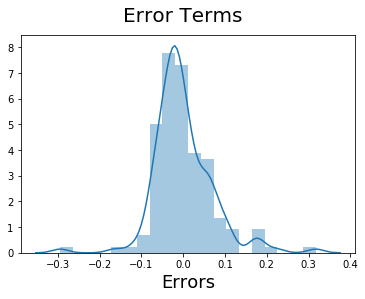

In [158]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Error terms seem to be approximately normally distributed, so the assumption on the linear modeling seems to be fulfilled

## Step 6 : Predictions And Evaluation of Test Case 

In [159]:
#Scaling the test set
# provide all numerical columns 
num_feature = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
carPrice_test[num_feature] = scaler.transform(carPrice_test[num_feature])
carPrice_test.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,six,three,twelve,two,hardtop,hatchback,sedan,wagon,Midrange,Highend
160,0,0,0,0,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,...,0,0,0,0,0,0,1,0,0,0
186,0,0,0,0,0.368966,0.497561,0.433333,0.699115,0.305275,0.181132,...,0,0,0,0,0,0,1,0,1,0
59,0,0,1,0,0.420690,0.596748,0.516667,0.522124,0.347944,0.230189,...,0,0,0,0,0,1,0,0,1,0
165,0,0,1,0,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,...,0,0,0,0,0,0,1,0,0,0
140,0,0,1,0,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,...,0,0,0,0,0,1,0,0,0,0


In [160]:
#Dividing into X and y
y_test = carPrice_test.pop('price')
X_test = carPrice_test

In [161]:
# Now let's use our model to make predictions.
X_train_new = X_train_1.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [162]:
# Making predictions
y_pred = lm.predict(X_test_new)

#### Evaluation of test via comparison of y_pred and y_test

In [163]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.892054997955816

##### Looking at the RMSE

In [164]:
#Returns the mean squared error; we'll take a square root
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

0.0759570261674591

1. 89% of variance of y_test is explained by y_pred which is a very good score.
2. Indicates that the model is fit and its not by chance.
3. RMSE is close to 0 indication that there is high accuracy between the actual and the predicted values.

Text(0, 0.5, 'y_pred')

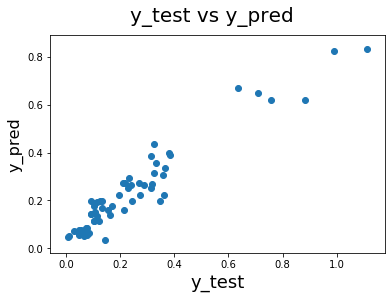

In [165]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

1. y_test and y_pred are not too much distant apart.
2. There is a pattern observed.

In [166]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     381.5
Date:                Mon, 25 Nov 2019   Prob (F-statistic):           7.18e-67
Time:                        13:49:05   Log-Likelihood:                 175.89
No. Observations:                 143   AIC:                            -343.8
Df Residuals:                     139   BIC:                            -331.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1068      0.017     -6.159      0.0

1. R-sqaured and Adjusted R-squared (extent of fit) - 0.892 and 0.889 - 89% of variance in price has been explained by the predictors.
2. F-stats and Prob(F-stats) (overall model fit) - -343.8 and 7.18e-67(approx. 0.0) - Model fit is significant and 90% of variance in price is just not by chance.
3. p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.
4. Also the co-efficients are positive indicating the model has no multicollinearity further.
5. Carwidth , horsepower and highend are the most significant variables on which the car price is dependent.


We can see that the equation of our best fitted line is:

$ carprice = -0.1068 + 0.4320  \times  carwidth + 0.4057 \times horsepower + 0.2895 \times Highend $